# O6 Newtonsche Ringe

Santiago R. , 26.3.2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Messwerte

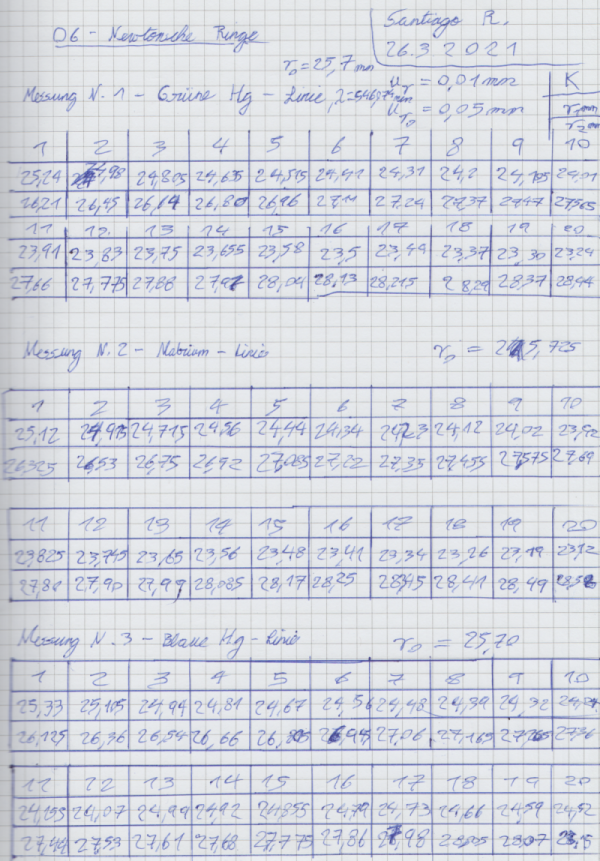

In [2]:
from IPython.display import Image
Image(filename='Messwerte.png', width = 800, height = 300)

Hinweis: Bei Messung N.3 wurden ab k > 12 die Einträge mit 23cm fehlerhaft mit 24cm für die erste Messreihe eingetragen. Insofern wurde beim digitalisieren der Messwerte die Korrektur -1cm für diese Fehleinträge vorgenommen 

# Bestimmung des Krümmungsradius $R$ der Linse mit der grünen Hg-Linie $\lambda = 546.074nm$

In [3]:
#Grüne Hg Linie
lamda = 546.074
k = np.arange(1,21,1)
r1 = np.array([25.24,24.98,24.805,24.635,24.515,24.41,24.31,24.2,24.105,24.01,23.91,23.83,23.75,23.655,23.58,23.5,23.44,23.37,23.3,23.24])
r2 = np.array([26.21,26.45,26.64,26.8,26.96,27.11,27.24,27.37,27.47,27.565,27.66,27.775,27.88,27.97,28.04,28.13,28.215,28.29,28.37,28.44])
u_ri = 0.05
r_Hg1 = (r2-r1)/2
u_rt_sqr = (np.sqrt((u_ri/2)**2+(u_ri/2)**2))*2*r_Hg1

R =  621.0 +/- 7.0 mm


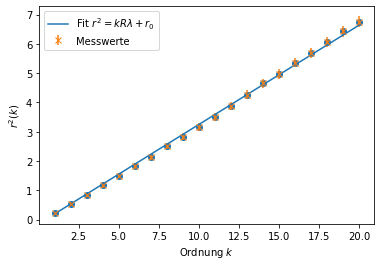

In [4]:
def r_square(k, R, r_0):
    lamda = 546.074*1e-6 #in mm
    r = R*k*lamda+r_0
    return r
popt, pcov = curve_fit(r_square,k,r_Hg1**2, sigma=u_rt_sqr,absolute_sigma=True)
plt.plot(k,r_square(k,*popt), label="Fit "r'$r^2 = kR\lambda +r_0$')
plt.scatter(k, r_Hg1**2)
plt.errorbar(k,r_Hg1**2, yerr=u_rt_sqr,fmt='o',marker='x',label="Messwerte")
plt.ylabel(r'$r^2(k)$')
plt.xlabel("Ordnung "r'$k$')
plt.legend(loc="upper left")
plt.savefig("FitRadius.pdf")
R = popt[0]
u_R = pcov[0,0]**0.5
print("R = ", np.round(R,0), "+/-", np.round(u_R,0), "mm")

In [5]:
def residuals(f, popt, x, y, res_name):
    residuals = y - f(x,*popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    R_2 = 1 - (ss_res / ss_tot)
    stdev = np.sqrt(ss_res/(len(x)-2))
    chisq = np.sum((residuals/stdev)**2)
    dof = len(x)-1
    chisq_dof = chisq/dof
    plt.scatter(x,residuals, label='Residuen, R^2 ='+str(np.round(R_2,5))+', X^2/dof ='+str(np.round(chisq_dof,5)))
    plt.xlabel("x-Werte")
    plt.ylabel("Differenz y-f(x)")
    plt.ylim(-np.abs(max(residuals))*1.5, np.abs(max(residuals))*1.5)
    plt.legend(loc="upper right", prop={'size': 8})
    plt.gca().set_aspect(aspect=20)
    #plt.rcParams["figure.figsize"] = (8,1)
    plt.savefig("Residuen"+res_name+".pdf", bbox_inches = "tight")
    print("R^2 =", R_2)
    print("X^2/dof =", chisq_dof)

R^2 = 0.9987893566895426
X^2/dof = 0.9473684210526317


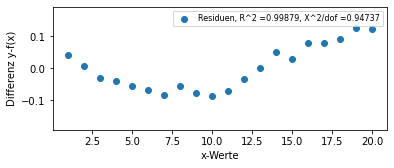

In [6]:
residuals(r_square, popt, k, r_Hg1**2 , "Radius")

# Bestimmung der Wellenlänge $\lambda _{Na}$ des Na-Dubletts mit dem Krümmungsradius $R$ 

In [7]:
#Gelbes Natrium Dublett
k = np.arange(1,21,1)
r1 = np.array([25.12,24.915,24.715,24.56,24.44,24.34,24.23,24.12,24.02,23.92,23.825,23.745,23.65,23.56,23.48,23.41,23.34,23.26,23.19,23.12])
r2 = np.array([26.325,26.53,26.75,26.92,27.085,27.22,27.35,27.455,27.575,27.69,27.80,27.90,27.99,28.085,28.17,28.25,28.345,28.41,28.49,28.58])
r_Na = (r2-r1)/2
u_ri = 0.01
u_rt_sqr = (np.sqrt((u_ri/2)**2+(u_ri/2)**2))*2*r_Na

A =  0.3676100288596641 +/- 0.0008561981524934133 mm^2
Wellenlänge d =  591.9127833814013 +/- 6.985775769354017 nm


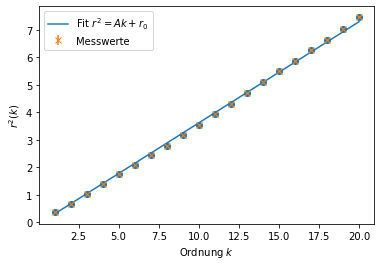

In [8]:
def r_square(k, A, r_0):
    r = A*k+r_0
    return r
popt, pcov = curve_fit(r_square,k,r_Na**2, sigma=u_rt_sqr, absolute_sigma=True)
plt.plot(k,r_square(k,*popt), label="Fit "r'$r^2 = Ak +r_0$')
plt.scatter(k, r_Na**2)
plt.errorbar(k,r_Na**2, yerr=u_rt_sqr,fmt='o',marker='x',label="Messwerte")
plt.ylabel(r'$r^2(k)$')
plt.xlabel("Ordnung "r'$k$')
plt.legend(loc="upper left")
plt.savefig("FitWellenlaengeNa.pdf")
print("A = ", popt[0], "+/-", pcov[0,0]**0.5, "mm^2")
print("Wellenlänge d = ", popt[0]/R *1e6, "+/-", np.sqrt((pcov[0,0]**0.5/R)**2+(popt[0]*u_R/(R**2))**2)*1e6 , "nm")

R^2 = 0.9990239359281603
X^2/dof = 0.9473684210526314


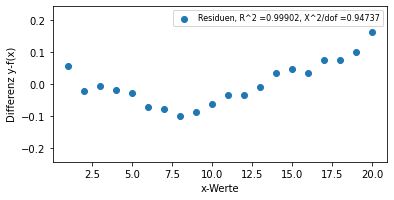

In [9]:
residuals(r_square, popt, k, r_Na**2 , "LambdaNa")

# Bestimmung der Wellenlänge $\lambda _{Hg}$ de blauen Hg-Linie mit dem Krümmungsradius $R$ 

In [10]:
#Blaue Hg Linie
k = np.arange(1,21,1)
r1 = np.array([25.33,25.105,24.94,24.81,24.67,24.56,24.48,24.39,24.32,24.24,24.155,24.07,23.99,23.92,23.855,23.79,23.73,23.66,23.59,23.52])
r2 = np.array([26.125,26.36,26.54,26.66,26.805,26.945,27.06,27.165,27.265,27.36,27.44,27.53,27.61,27.68,27.775,27.86,27.98,28.05,28.07,28.15])
r_Hg2 = (r2-r1)/2
u_ri = 0.05
u_rt_sqr = (np.sqrt((u_ri/2)**2+(u_ri/2)**2))*2*r_Hg2

A =  0.26566724272774184 +/- 0.003404229428289404 mm^2
Wellenlänge d =  427.76808234541187 +/- 7.3851531289044905 nm


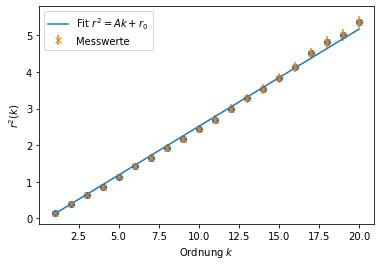

In [11]:
def r_square(k, A, r_0):
    r = A*k+r_0
    return r
popt, pcov = curve_fit(r_square,k,r_Hg2**2, sigma=u_rt_sqr, absolute_sigma=True)
plt.plot(k,r_square(k,*popt), label="Fit "r'$r^2 = Ak +r_0$')
plt.scatter(k, r_Hg2**2)
plt.errorbar(k,r_Hg2**2, yerr=u_rt_sqr,fmt='o',marker='x',label="Messwerte")
plt.ylabel(r'$r^2(k)$')
plt.xlabel("Ordnung "r'$k$')
plt.legend(loc="upper left")
plt.savefig("FitWellenlaengeHg.pdf")
print("A = ", popt[0], "+/-", pcov[0,0]**0.5, "mm^2")
print("Wellenlänge d = ", popt[0]/R *1e6, "+/-", np.sqrt((pcov[0,0]**0.5/R)**2+(popt[0]*u_R/(R**2))**2)*1e6 , "nm")

R^2 = 0.997182944245223
X^2/dof = 0.9473684210526315


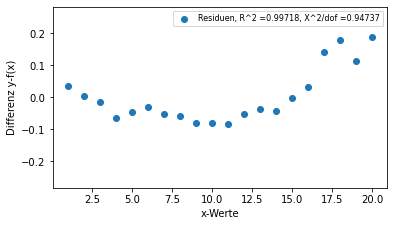

In [12]:
residuals(r_square, popt, k, r_Hg2**2 , "LambdaHg")

# Bilder der Ringe

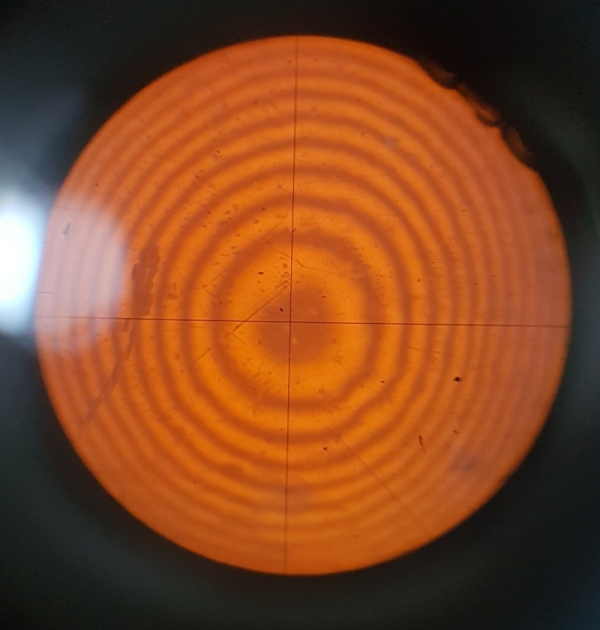

In [13]:
#Natrium Dublett
Image(filename='20210326_120320.jpg', width = 800, height = 300)

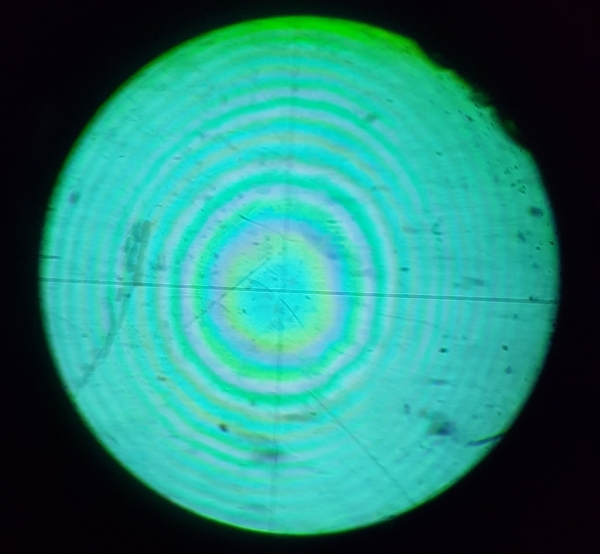

In [14]:
#Hg ohne Filter
Image(filename='20210326_122725.jpg', width = 800, height = 300)

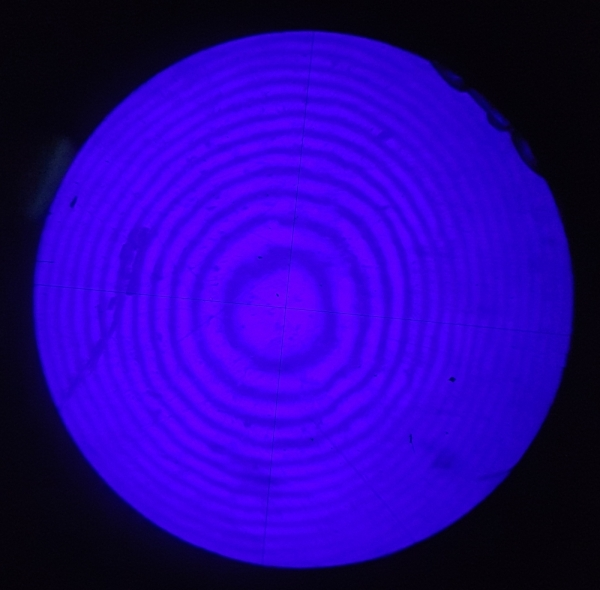

In [15]:
#Hg Blaue Spektrallinie
Image(filename='20210326_122757.jpg', width = 800, height = 300)

# Fragen

#### 1. Die Newtonschen Ringe sind nicht nur bei Reflexion sondern auch in Durchsicht zu beobachten. Wie muss Abb. 12.3 ergänzt werden, um diese Erscheinung zu erklären?

Man müsste die Brechung des hindurchleuchtenden Lichts ergänzen beim Übergang Luft-Glas und dann wieder Glas-Luft. Eine dementsprechende scheinbare Verschiebung der Lage und Abstände der Ringe wäre damit auch je nach Wellenlänge unterschiedlich stark zu erwarten.

#### 2. Wie sehen Newtonsche Ringe bei Beleuchtung der Anordnung mit weißem Licht aus?


Aufgrund der Wellenabhängigkeit der Brechung und weil die Wellenstrahlen des Lichts Newtonscher Ringe bei der Reflexion und den somit erneuten Durchgang durch die Linse unterschiedlich gebrochen werden, erscheinen diese regenbogenartig, mit Ringen unterschiedlicher Farben und somit Wellenlängen an unterschiedlichen Abständen $r_i$ vom Mittelpunkt der Linse, auch bei gleicher Ordnung der Maxima/Minima

#### 3.  Welche Bedingung gilt für die Radien der hellen Newtonschen Ringe? Warum werden im Versuch die Radien der dunklen Ringe ausgewertet?

Die Radien der hellen newtonschen Ringe sind zum einen unscharfer definiert und somit schwieriger eindeutig zu messen. Ausserdem gilt nach Gleichung (12.2) im Skript die gegebene Bedingung nur für die Minima der Ringe

#### 4.  Wie ändern sich die grafischen Darstellungen r k 2 = f (k), wenn die Linse die Glasplatte nicht einwandfrei  berührt?
 


Aufgrund der Zunahme des Abstands d würde sich die Phasenverschiebung verändern und somit auch die Lage $r$ der Minima/Maxima der Newtonschen Ringe.